In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd

import scipy as sp
import datetime

import matplotlib.pylab as plt
import os
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import seaborn as sbn
from scipy.stats import norm
from scipy.stats import lognorm
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from pykalman import KalmanFilter
#from johansen import coint_johansen

from datetime import datetime
from dateutil import relativedelta
from scipy.stats import norm
import quandl
 # Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

A basic single factor LMM model is attempted.
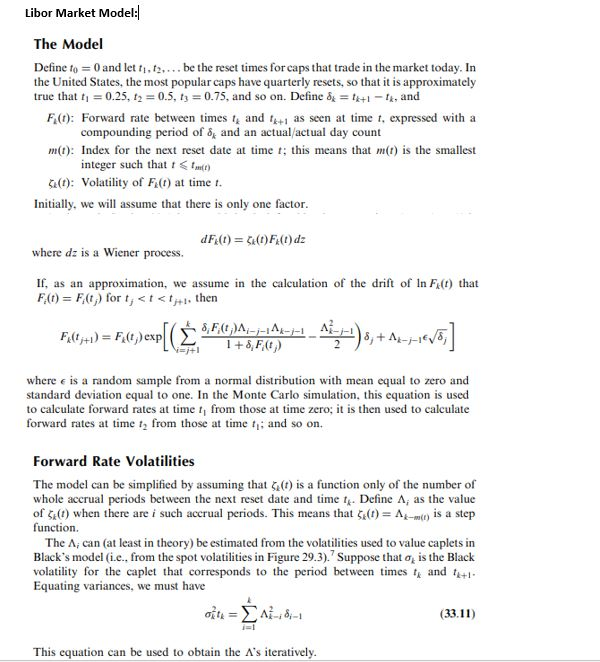

In [3]:
'''Black caplet Spot volatilities for first four caplets with tenor 1 yr between each caplet'''
spot_vol=[0.24,0.22,0.2,0.18]
A=[0,0,0,0]
for l in range(0,len(spot_vol)):
    if l==0:
        A[l]=spot_vol[l]
    elif l==1:
        A[l]=np.sqrt((l+1)*spot_vol[l]**2-A[l-1]**2)
    elif l==2:
        A[l]=np.sqrt((l+1)*spot_vol[l]**2-A[l-2]**2-A[l-1]**2)
    elif l==3:
        A[l]=np.sqrt((l+1)*spot_vol[l]**2-A[l-2]**2-A[l-1]**2-A[l-3]**2)

'''Forward rate volatilities are arrived using Black caplet spot vols'''
A

[0.24, 0.1979898987322333, 0.15231546211727826, 0.09797958971132698]

In [4]:
F_k0=[[0.041,0.042,0.045,0.046],[0,0,0,0],[0,0,0,0],[0,0,0,0]] # at time t=0,1,2 in years
'''Forward Rates at time t=0 '''
A_k0=[[0.41,0.42,0.45,0.46],[0.45,0.47,0.55,0.65],[0.49,0.52,0.6,0.69],[0.49,0.52,0.6,0.69]]# at time t=0,1,2 in years
'''Forward Rate vols'''
t=0 

'''Attempting a Single factor Libor Market model estimating future Forward Rates for pricing of Caps & Floors with tenor in years'''
def LMM(tenor):
    '''Function in practise will be run large number of times as it is in Monte Carlo simulation to get the average values'''
    full=[]
    
    for j in range(0,len(F_k0)):
        
        for i in range(j+1,len(F_k0)):
            
            s_term=((tenor*F_k0[j][i]*A_k0[j][i-j-1]*A_k0[j][len(F_k0)-j-1]/(1+tenor*F_k0[j][i])) -  (0.5*A_k0[j][len(F_k0)-j-1]**2))*tenor +   A_k0[j][len(F_k0)-j-1]*np.random.normal(0,1)*np.sqrt(tenor)
            
            
            if j+1<len(F_k0):
                F_k0[j+1][i]=F_k0[j][i]*np.exp(s_term)
            else:
                F_k0[j][i]=F_k0[j][i]*np.exp(s_term)  
    return F_k0

In [5]:
LMM(4)

[[0.041, 0.042, 0.045, 0.046],
 [0, 0.027898945062483155, 0.08059923458990083, 0.04983916233246904],
 [0, 0, 0.04744939565565743, 0.042038604276089075],
 [0, 0, 0, 0.002408952140184783]]